In [41]:
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img,img_to_array
from tensorflow.keras.optimizers import Adam
import random
import os
import matplotlib.pyplot as plt
import numpy as np

In [18]:
!mkdir ~/.kaggle

In [19]:
!mv kaggle.json ~/.kaggle

In [20]:
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 99% 321M/325M [00:07<00:00, 40.8MB/s]
100% 325M/325M [00:07<00:00, 46.2MB/s]


In [ ]:
!unzip skin-cancer-malignant-vs-benign.zip

In [23]:
os.chdir("data")

In [24]:
classes=["malignant","benign"]

In [25]:
datagen = ImageDataGenerator(
        rescale=1/255,
        rotation_range=40,  
        zoom_range = 0.2, 
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=True)
train_batches = ImageDataGenerator().flow_from_directory(directory="./train",classes=classes,target_size=(224,224),batch_size=32)
valid_batches= ImageDataGenerator().flow_from_directory(directory="./test",classes=classes,target_size=(224,224),batch_size=32)
test_batches = datagen.flow_from_directory(directory="./test",classes=classes,target_size=(224,224),batch_size=32)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [27]:
model = Sequential([
                    Conv2D(filters=32,kernel_size=(3,3),padding="same",input_shape=(224,224,3)),
                    MaxPool2D(pool_size=(2,2),strides=2),
                    Conv2D(filters=64,kernel_size=(3,3),padding="same"),
                    MaxPool2D(pool_size=(2,2),strides=2),
                    Flatten(),
                    Dense(64,activation="relu"),
                    Dense(64,activation="relu"),
                    Dense(128,activation="relu"),
                    Dense(2,activation="softmax")

])

In [28]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [29]:
model.fit(train_batches,validation_data=valid_batches,epochs=10)

Epoch 1/10
83/83 [==============================] - 185s 2s/step - loss: 486.4240 - accuracy: 0.5173 - val_loss: 8.0714 - val_accuracy: 0.7833
Epoch 2/10
83/83 [==============================] - 187s 2s/step - loss: 15.0475 - accuracy: 0.7314 - val_loss: 3.4539 - val_accuracy: 0.7939
Epoch 3/10
83/83 [==============================] - 184s 2s/step - loss: 3.2889 - accuracy: 0.7832 - val_loss: 2.2632 - val_accuracy: 0.8076
Epoch 4/10
83/83 [==============================] - 184s 2s/step - loss: 2.5539 - accuracy: 0.7892 - val_loss: 2.8964 - val_accuracy: 0.7091
Epoch 5/10
83/83 [==============================] - 185s 2s/step - loss: 4.3354 - accuracy: 0.7334 - val_loss: 16.5206 - val_accuracy: 0.6061
Epoch 6/10
83/83 [==============================] - 185s 2s/step - loss: 11.7744 - accuracy: 0.6941 - val_loss: 3.6176 - val_accuracy: 0.8061
Epoch 7/10
83/83 [==============================] - 184s 2s/step - loss: 2.8428 - accuracy: 0.7850 - val_loss: 1.1764 - val_accuracy: 0.8197
Epoch 8/

In [30]:
model.evaluate(test_batches)

21/21 [==============================] - 20s 949ms/step - loss: 0.6884 - accuracy: 0.4576


[0.688381552696228, 0.4575757682323456]

(32, 224, 224, 3)
[0. 1.]


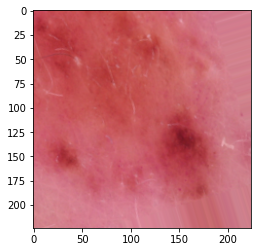

In [31]:
images , lables =  next(test_batches)
print(images.shape)
plt.imshow(images[0])
print(lables[0])

In [35]:
imgs ,lables = next(test_batches)
predictions = model.predict(imgs)
print(predictions)

[[0.5983751  0.4016249 ]
 [0.5991884  0.4008116 ]
 [0.5372267  0.46277335]
 [0.5682187  0.43178126]
 [0.55074406 0.44925594]
 [0.6359697  0.36403036]
 [0.561465   0.43853498]
 [0.5394846  0.4605154 ]
 [0.5930218  0.40697813]
 [0.6033187  0.39668137]
 [0.5394187  0.4605813 ]
 [0.64503974 0.3549602 ]
 [0.58591324 0.4140867 ]
 [0.58222157 0.41777846]
 [0.5408796  0.4591204 ]
 [0.5692995  0.4307005 ]
 [0.5558854  0.44411466]
 [0.53862    0.46137998]
 [0.57658345 0.42341658]
 [0.5792137  0.42078632]
 [0.6385203  0.3614797 ]
 [0.5715115  0.42848843]
 [0.5309661  0.4690339 ]
 [0.53706807 0.46293193]
 [0.5503339  0.44966602]
 [0.55744433 0.44255567]
 [0.6283237  0.37167633]
 [0.56051254 0.43948746]
 [0.56548053 0.43451947]
 [0.5430146  0.45698535]
 [0.5421498  0.45785025]
 [0.53854257 0.46145743]]


In [36]:
print(lables)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


real:  malignant
prediction:  malignant


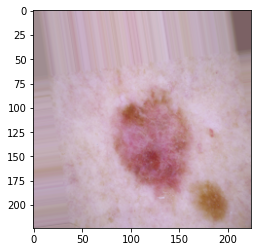

In [38]:
plt.imshow(imgs[0])
predictions = np.argmax(predictions,axis=1)
lables = np.argmax(lables,axis=1)
print("real: ",classes[lables[0]])
print("prediction: ",classes[predictions[0]])

In [39]:
model.save("MalignantvsBenign.h5")

In [42]:
image = load_img("/content/test/benign/1034.jpg")
image = img_to_array(image)
image = np.expand_dims(image,axis=0)
print(image.shape)


(1, 224, 224, 3)


In [43]:
prediction = model.predict(image)
prediction = np.argmax(predictions)
prediction_label = classes[prediction]

print(prediction_label)

malignant
